In [1]:
# Imports 
import pandas as pd

# numpy imports
import numpy as np
import numpy.linalg  as lg

# Common imports
from tqdm import tqdm

# Import pytorch
import torch

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# sklearn pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# plotting
import matplotlib.pyplot as plt

# Data Analysis and Processing

In [2]:
data = pd.read_excel('Concrete_Data.xls')
data.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
display(data.isna().sum() ); print('\n')
# Null values checking

print('product description : \n  ')
data.describe()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64



product description : 
  


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
train, val, y_train, y_val = train_test_split( data.drop( ['Concrete compressive strength(MPa, megapascals) '], axis=1 ),
                                               data['Concrete compressive strength(MPa, megapascals) '], 
                                               test_size = 0.3,
                                               shuffle = True, # We can change here as 'Fasle' to not shuffle the data 
                                               random_state= 1933,
                                               )

In [6]:
standardization = StandardScaler()

# Fitting the original data
#standardization.fit(data.drop( ['Concrete compressive strength(MPa, megapascals) '], axis=1 ))
standardization.fit(train)

# transforming the train and validation data
normalized_train, normalized_val = standardization.transform(train), standardization.transform(val)

In [7]:
print(f" Mean of all columns after normalization in :  \n\n validation data : {normalized_val.mean(axis=0).round(4)} \n train data :  {normalized_train.mean(axis=0).round(4)} ")

 Mean of all columns after normalization in :  

 validation data : [ 0.0584 -0.058   0.0918 -0.0802  0.057  -0.0369 -0.001   0.0008] 
 train data :  [ 0. -0.  0. -0.  0.  0.  0. -0.] 


We can see here , as our data not so big the mean in validation dataset is slightly deviating from the mean of zero, while standardizing

In [8]:
#train['bias'], val['bias'] = [1]*(len(train)), [1]*(len(val))

In [9]:
# normalized_train = np.append(normalized_train, np.ones((len(train),1)), axis=1)
# normalized_val = np.append(normalized_val, np.ones((len(val),1)), axis=1)

In [10]:
# print(f'normalized val mean : {normalized_val.mean(0).round(3)}', '\n\n', val.mean().round(3) )

# Question - 1

## Part A and B

In [14]:
def r2_score_calculation(weight, bias, data, y_true):

    # predicting the y
    y_pred = data@weight + bias

    # changing them into numpy array, incase they are in tensors
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # calculating the R2_score here
    score = max( r2_score(y_true, y_pred)*100 , -1 )

    return score

In [15]:
class Gradient_Descent():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = train.to_numpy(), val.to_numpy()
        self.y_train, self.y_val = y_train.to_numpy(), y_val.to_numpy()

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = normalized_train, normalized_val

    def Batch_GD(self, lr=1e-3, epochs=100, normalized=False, print_enabled=False ):
        
        # weight and Bias Initializing
        np.random.seed(10)
        w = np.random.randn(train.shape[1])
        bias = np.random.randn(1)

        # mse loss to plot , ( we can infer the model's performance )
        loss_list = []

        # Selecting data based on whether it is normalized or not
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batch_GD is done here
        for e in tqdm(range(epochs)):

            y_pred = data@w + bias

            # calculating loss here:
            loss = np.mean( ( self.y_train - y_pred )**2 )/2

            # performing GD here
            w_grad =  - ( data.transpose()@( self.y_train - y_pred ) )/len(self.train)
           
            bias_grad = -np.mean( self.y_train - y_pred )

            # weight update
            w = w - lr*w_grad
            bias = bias - lr*bias_grad

            # appending loss to the list
            loss_list.append(loss)

        if print_enabled:
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} and data_normalized : {normalized}")
            print(f" Final Validation loss (MSE) is : {np.mean((self.y_val - val_data@w + bias)**2):.4f} ")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w,bias,val_data,self.y_val):.4f} %")

        return loss_list


In [100]:
numpy_GD = Gradient_Descent()

In [102]:
lr = [ 1e-8 ,1e-7, 5e-7, ] 
# higher lr than this gives raise to float(inf) value

loss_array = [numpy_GD.Batch_GD( lr=i, epochs=3000, normalized=False, print_enabled=True ) for i in lr]

100%|██████████| 3000/3000 [00:00<00:00, 33998.41it/s]


 Learning_rate : 1e-08 and no.of epochs : 3000 and data_normalized : False
 Final Validation loss (MSE) is : 24294.4797 
 Final Train loss (MSE) is : 12593.3818  
 Final Validation R2_score is : -1.0000 %


100%|██████████| 3000/3000 [00:00<00:00, 43014.83it/s]


 Learning_rate : 1e-07 and no.of epochs : 3000 and data_normalized : False
 Final Validation loss (MSE) is : 640.0931 
 Final Train loss (MSE) is : 308.1808  
 Final Validation R2_score is : -1.0000 %


100%|██████████| 3000/3000 [00:00<00:00, 34796.63it/s]

 Learning_rate : 5e-07 and no.of epochs : 3000 and data_normalized : False
 Final Validation loss (MSE) is : 113.0141 
 Final Train loss (MSE) is : 55.7833  
 Final Validation R2_score is : 57.5954 %


In [103]:
lr_norm = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ]
loss_array_norm = [ numpy_GD.Batch_GD( lr=i, epochs=2000, normalized=True , print_enabled=False ) for i in lr_norm ]

# You can change print ' enabled = True ' to see the final loss , values

100%|██████████| 2000/2000 [00:00<00:00, 38284.39it/s]


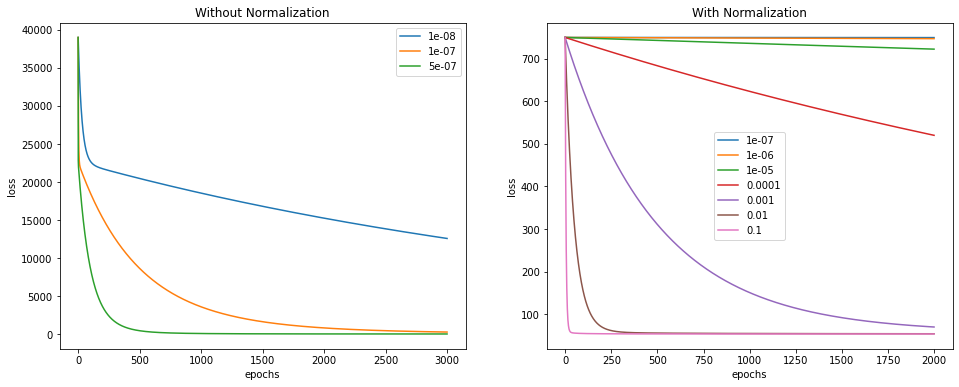

In [104]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
for i,v in enumerate(lr):
    plt.plot(loss_array[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Without Normalization")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(lr_norm):
    plt.plot(loss_array_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("With Normalization")
plt.legend(loc="best")

plt.show()

***`Observations :`***

As we can see ***`with Normalization`***, we are able to use good amount of Learning Rate and ***achieve minima much faster*** and so ***lower training time or epochs***. So we can use ***higher learning rates*** like 1e-3, 1e-4, 5e-3, etc...

But ***`Without Normalization`***, The updates are much noisier and we are only able to use ***very small Learning rates*** as our gradients explodes with higher lr and much ***noisier updates*** seriously affects convergences and so ***higher training time/epochs*** and we can only use ***lower learning rates*** like 1e-8, 1e-7, 1e-6 etc..

## Part C

`Pytorch Implementation`

In [135]:
class pytorch_GD():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = torch.tensor(train.to_numpy(), dtype=torch.float32), torch.tensor(val.to_numpy(), dtype=torch.float32)
        self.y_train, self.y_val = torch.tensor(y_train.to_numpy(), dtype=torch.float32), torch.tensor(y_val.to_numpy(), dtype=torch.float32)

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = torch.tensor(normalized_train, dtype=torch.float32), torch.tensor(normalized_val, dtype=torch.float32)

    def Batch_GD(self, lr=1e-5, epochs=100, normalized=False, print_enabled=False ):
        
        torch.manual_seed(3)
        w = torch.randn(train.shape[1], requires_grad=True)
        bias = torch.randn(1, requires_grad=True)

        loss_list = []

        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batch_GD is done here
        for e in tqdm(range(epochs)):

            y_pred = ( data@w + bias )

            # calculating loss here:
            loss = (( self.y_train - y_pred )**2).mean()/2

            # performing back-prop here
            loss.backward()

            # weight update
            with torch.no_grad():
                w -= lr*w.grad
                bias -= lr*bias.grad

            # To stop gradient accumulation
            if w.grad != None:  w.grad.zero_()   
            if bias.grad != None: bias.grad.zero_()

            # appending loss to the list
            loss_list.append(loss.item())

        if print_enabled: 
            print(f" Learning_rate = {lr} and no.of epochs = {epochs}")
            print(f" Final Validation loss (MSE) is : {torch.mean((self.y_val - val_data@w + bias)**2).item():.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w.detach().numpy(),bias.detach().numpy(),val_data,self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")
        
        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list

In [136]:
torch_GD = pytorch_GD()

In [137]:
lr = [ 1e-8 ,1e-7, 5e-7, ]
loss_array = [torch_GD.Batch_GD( lr=i, epochs=2000, normalized=False, print_enabled=True ) for i in lr]

100%|██████████| 2000/2000 [00:00<00:00, 3788.00it/s]


 Learning_rate = 1e-08 and no.of epochs = 2000
 Final Validation loss (MSE) is : 13559.2334 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 6815.1929  


100%|██████████| 2000/2000 [00:00<00:00, 3601.91it/s]


 Learning_rate = 1e-07 and no.of epochs = 2000
 Final Validation loss (MSE) is : 1675.3063 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 799.5734  


100%|██████████| 2000/2000 [00:00<00:00, 3944.17it/s]

 Learning_rate = 5e-07 and no.of epochs = 2000
 Final Validation loss (MSE) is : 156.1718 
 Final Validation R2_score is : 44.7840 %
 Final Train loss (MSE) is : 72.7590  


In [138]:
lr_norm = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ]
loss_array_norm = [torch_GD.Batch_GD( lr=i, epochs=2000, normalized=True ) for i in lr_norm]

100%|██████████| 2000/2000 [00:00<00:00, 3382.81it/s]


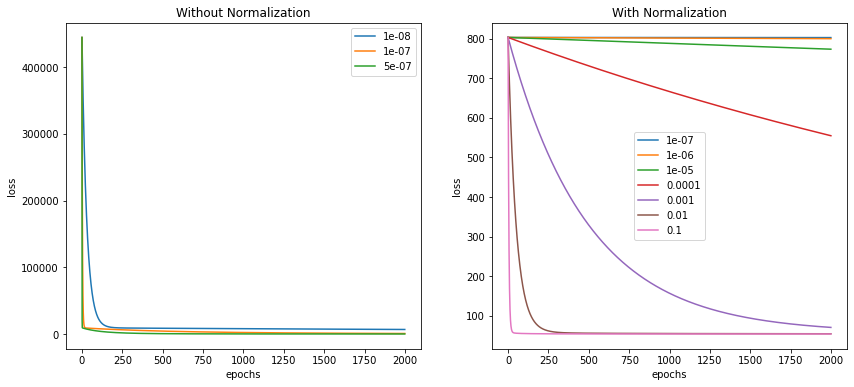

In [139]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(lr):
    plt.plot(loss_array[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Without Normalization")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(lr_norm):
    plt.plot(loss_array_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("With Normalization")
plt.legend(loc="best")
plt.show()

Therefore we have got almost same graph with Pytorch implementation and Numpy implementation , The convergence values in both are same upto 2/3 decimal places 

We can verify our results in the graphs

# Question - 2 

## Numpy Implementation

In [146]:
class Numpy_SGD_Mini_Batch():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = train.to_numpy(), val.to_numpy()
        self.y_train, self.y_val = y_train.to_numpy(), y_val.to_numpy()

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = normalized_train, normalized_val

    def SGD_Mini_Batch(self, lr=1e-3, epochs=100, normalized=False, print_enabled=False, batch_size=1, shuffle_data=False ):
        
        # weight and Bias Initializing
        np.random.seed(18)
        w = np.random.randn(train.shape[1])
        bias = np.random.randn(1)

        loss_list = []

        # Selecting data based on whether it is normalized or not
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batching the data
        batched_data = [ ( data[i:i+batch_size], self.y_train[i:i+batch_size] ) for i in range(0,len(data),batch_size) ]

        # Shuffling data , if it is given
        if shuffle_data : batched_data = shuffle(batched_data)

        # Batch_GD is done here
        for e in tqdm(range(epochs)):

            epoch_loss = 0

            for i,batch in enumerate(batched_data):

                data_points, y_true = batch

                y_pred = data_points@w + bias

                # calculating loss here:
                loss = np.mean( ( y_true - y_pred )**2 )/2

                # performing GD here
                w_grad =  - ( data_points.transpose()@( y_true - y_pred ) )/len(data_points)
            
                bias_grad = -np.mean( y_true - y_pred )

                # weight update
                w = w - lr*w_grad
                bias = bias - lr*bias_grad

                # adding the loss
                epoch_loss += ( loss*len(data_points) )

            # appending loss to the list
            loss_list.append(epoch_loss/len(train))

        if print_enabled:
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} and data_normalized : {normalized} and batch_size : {batch_size}")
            print(f" Final Validation loss (MSE) is : {np.mean((self.y_val - val_data@w + bias)**2):.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w,bias,val_data,self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")

        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list


In [147]:
np_SGD_mini_batch = Numpy_SGD_Mini_Batch()
parameters_SGD_np = {'epochs':30, 'normalized':False, 'print_enabled':True, 'batch_size':1, 'shuffle_data':True, }

In [148]:
lr_SGD_np = [1e-8, 1e-7, 5e-7]
loss_array_SGD = [ np_SGD_mini_batch.SGD_Mini_Batch(**parameters_SGD_np, lr=i) for i in lr_SGD_np]

100%|██████████| 30/30 [00:00<00:00, 69.92it/s]


 Learning_rate : 1e-08 and no.of epochs : 30 and data_normalized : False and batch_size : 1
 Final Validation loss (MSE) is : 1304.3679 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 659.9480  


100%|██████████| 30/30 [00:00<00:00, 55.24it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1
 Final Validation loss (MSE) is : 110.1469 
 Final Validation R2_score is : 59.2771 %
 Final Train loss (MSE) is : 58.0347  


100%|██████████| 30/30 [00:00<00:00, 66.14it/s]

 Learning_rate : 5e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1
 Final Validation loss (MSE) is : 143.0698 
 Final Validation R2_score is : 49.1297 %
 Final Train loss (MSE) is : 89.4939  


In [151]:
lr_SGD_norm_np = [1e-7, 1e-6, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ]

parameters_SGD_np['normalized'] = True
parameters_SGD_np['print_enabled'] = False

loss_array_SGD_norm = [ np_SGD_mini_batch.SGD_Mini_Batch(**parameters_SGD_np, lr=i) for i in lr_SGD_norm_np]

100%|██████████| 30/30 [00:00<00:00, 64.27it/s]


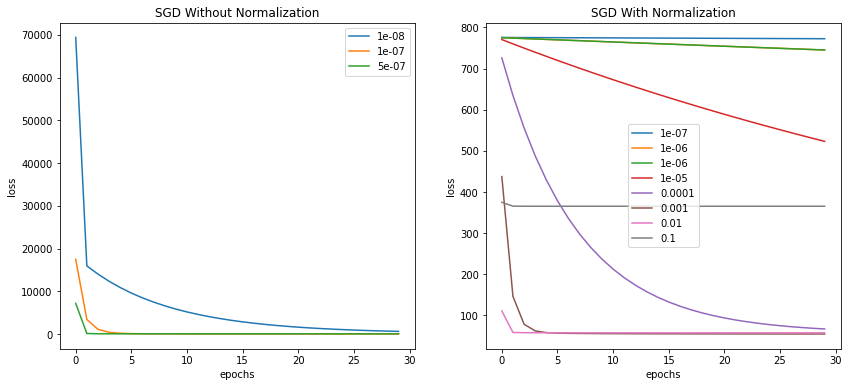

In [152]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(lr_SGD_np):
    plt.plot(loss_array_SGD[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SGD Without Normalization")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(lr_SGD_norm_np):
    plt.plot(loss_array_SGD_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SGD With Normalization")
plt.legend(loc="best")
plt.show()

***`MINI Batch`***

In [160]:
# lr_mb_np = [1e-8, 1e-7, 5e-7]

parameters_SGD_np = {'epochs':500, 'normalized':False, 'print_enabled':True, 'shuffle_data':True, }
batch_sizes = [8,32,108,256]

loss_array_mb = [ np_SGD_mini_batch.SGD_Mini_Batch(**parameters_SGD_np, lr=1e-7, batch_size=i) for i in batch_sizes]

100%|██████████| 500/500 [00:00<00:00, 547.04it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 8
 Final Validation loss (MSE) is : 108.9510 
 Final Validation R2_score is : 59.5293 %
 Final Train loss (MSE) is : 54.9585  


100%|██████████| 500/500 [00:00<00:00, 2219.84it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 32
 Final Validation loss (MSE) is : 112.0827 
 Final Validation R2_score is : 58.0971 %
 Final Train loss (MSE) is : 55.9022  


100%|██████████| 500/500 [00:00<00:00, 5383.12it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 108
 Final Validation loss (MSE) is : 374.7709 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 170.1564  


100%|██████████| 500/500 [00:00<00:00, 14109.79it/s]

 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 256
 Final Validation loss (MSE) is : 3161.7826 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 1581.9632  


In [161]:
# normalized = True
parameters_SGD_np = {'epochs':500, 'normalized':True, 'print_enabled':False, 'shuffle_data':True, }
batch_sizes_norm = [8,16,32,108,256]

loss_array_mb_norm = [ np_SGD_mini_batch.SGD_Mini_Batch(**parameters_SGD_np, lr=1e-3, batch_size=i) for i in batch_sizes_norm]

100%|██████████| 500/500 [00:00<00:00, 14037.44it/s]


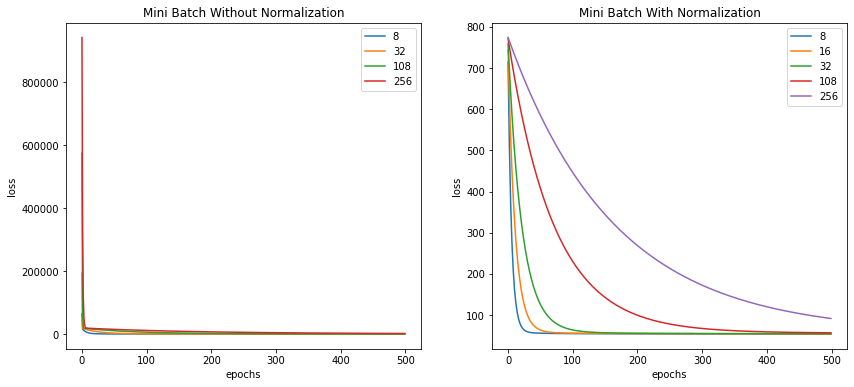

In [162]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(batch_sizes):
    plt.plot(loss_array_mb[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Mini Batch Without Normalization")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(batch_sizes_norm):
    plt.plot(loss_array_mb_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Mini Batch With Normalization")
plt.legend(loc="best")
plt.show()

## Pytorch Implementation

In [172]:
class pytorch_SGD_Mini_Batch():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = torch.tensor(train.to_numpy(), dtype=torch.float32), torch.tensor(val.to_numpy(), dtype=torch.float32)
        self.y_train, self.y_val = torch.tensor(y_train.to_numpy(), dtype=torch.float32), torch.tensor(y_val.to_numpy(), dtype=torch.float32)

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = torch.tensor(normalized_train, dtype=torch.float32), torch.tensor(normalized_val, dtype=torch.float32)

    ''' If Batch Size == 1 and shuffle the data , then we are doing SGD '''
    def Batch_And_SGD(self, lr=1e-5, epochs=100, normalized=False, print_enabled=False, batch_size=1, shuffle_data=False ):

        # weight initializing
        torch.manual_seed(10)
        w = torch.randn(train.shape[1], requires_grad=True)
        bias = torch.randn(1, requires_grad=True)

        # optimizer
        optimizer = torch.optim.SGD( [{'params':w, 'lr':lr},{'params':bias, 'lr':lr}] )
        
        loss_list = []

        # Data Initialization
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batching the data
        batched_data = [ ( data[i:i+batch_size], self.y_train[i:i+batch_size] ) for i in range(0,len(data),batch_size) ]

        # Shuffling data , if it is given
        if shuffle_data : batched_data = shuffle(batched_data)

        # Mini_Batch_GD is done here
        for e in tqdm(range(epochs)):

            epoch_loss = 0

            for i,batch in enumerate(batched_data):
                
                data_points, y_true = batch

                y_pred = ( data_points@w + bias )

                #print(data_points.shape, y_true) -> just to check

                # calculating loss here:
                loss = (( y_true - y_pred )**2).mean()/2

                # performing back-prop here
                loss.backward()

                # weight update 
                # If we are not using Optimizer, we can use this code block for Weight updation
                ''' with torch.no_grad():
                    # print(w.grad, data_points.transpose(0,1)@(y_true-y_pred)/len(data_points) )
                    w -= lr*w.grad
                    bias -= lr*bias.grad '''
                    
                optimizer.step()
                optimizer.zero_grad()

                # To stop gradient accumulation
                if w.grad != None:  w.grad.zero_()   
                if bias.grad != None: bias.grad.zero_()

                epoch_loss += ( loss.item()*len(data_points) ) # Multiplying the loss with the batch_size to remove the batch dependency of the loss

            # appending mean_loss to the list
            loss_list.append(epoch_loss/len(train))

        if print_enabled: 
            print(f" Learning_rate = {lr} and no.of epochs = {epochs} and data_normalized : {normalized} and batch_size : {batch_size}")
            print(f" Final Validation loss (MSE) is : {torch.mean((self.y_val - val_data@w + bias)**2).item():.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w.detach().numpy(), bias.detach().numpy(), val_data, self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")
        
        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list

In [176]:
torch_SGD_mini_batch = pytorch_SGD_Mini_Batch()

In [166]:
parameters_SGD = {'epochs':30, 'normalized':False, 'print_enabled':True, 'batch_size':1, 'shuffle_data':True, }

In [167]:
lr_SGD = [1e-8, 1e-7, 5e-7]
loss_array_SGD= [ torch_SGD_mini_batch.Batch_And_SGD(**parameters_SGD, lr=i) for i in lr_SGD]

100%|██████████| 30/30 [00:05<00:00,  5.04it/s]


 Learning_rate = 1e-08 and no.of epochs = 30
 Final Validation loss (MSE) is : 2392.5396 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 1121.3069  


100%|██████████| 30/30 [00:05<00:00,  5.08it/s]


 Learning_rate = 1e-07 and no.of epochs = 30
 Final Validation loss (MSE) is : 151.6318 
 Final Validation R2_score is : 36.4465 %
 Final Train loss (MSE) is : 75.0588  


100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

 Learning_rate = 5e-07 and no.of epochs = 30
 Final Validation loss (MSE) is : 136.9998 
 Final Validation R2_score is : 54.7397 %
 Final Train loss (MSE) is : 99.2925  


Therefore we can see here , the ***optimal Lr is around 1e-7*** for data ***`without Normalization for SGD`***

In [168]:
lr_SGD_norm = [1e-7, 1e-6, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ]

parameters_SGD['normalized'] = True
parameters_SGD['print_enabled'] = False

loss_array_SGD_norm = [ torch_SGD_mini_batch.Batch_And_SGD(**parameters_SGD, lr=i) for i in lr_SGD_norm]

100%|██████████| 30/30 [00:05<00:00,  5.02it/s]


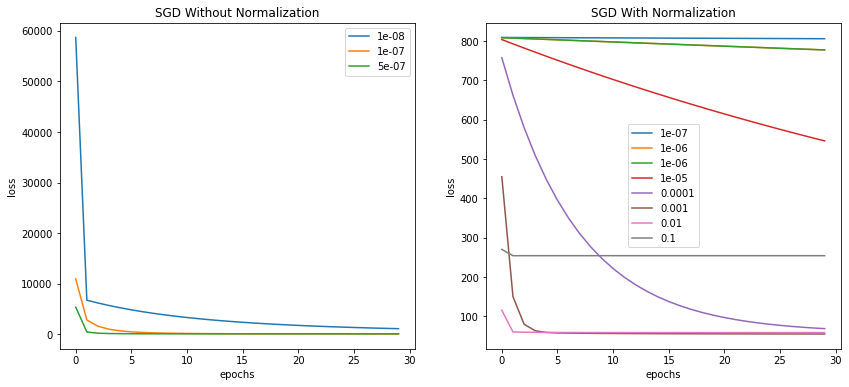

In [169]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(lr_SGD):
    plt.plot(loss_array_SGD[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SGD Without Normalization")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(lr_SGD_norm):
    plt.plot(loss_array_SGD_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SGD With Normalization")
plt.legend(loc="best")
plt.show()

***`Observation`***

Here SGD is trained with 30 epochs

***With Normalization***, we were able to get ***less loss*** with the same steps and also with ***higher learning rates*** 

and little better results than ***full batch GD without Normalization*** but

***Training time is very high than*** the full batch GD


***Without Normalization***, we were able to get ***better results than full-batch GD***,

but here the ***time taken for training is around 1000 times higher*** 

And also were able to use only ***lower learning rates*** here

***`MINI Batch`***

In [178]:
parameters_SGD = {'epochs':500, 'normalized':False, 'print_enabled':True, 'shuffle_data':True, }
batch_sizes = [8,32,108,256]

loss_array_mb = [ torch_SGD_mini_batch.Batch_And_SGD(**parameters_SGD, lr=1e-7, batch_size=i) for i in batch_sizes]

100%|██████████| 500/500 [00:12<00:00, 38.79it/s]


 Learning_rate = 1e-07 and no.of epochs = 500 and data_normalized : False and batch_size : 8
 Final Validation loss (MSE) is : 120.8805 
 Final Validation R2_score is : 54.9847 %
 Final Train loss (MSE) is : 57.6407  


100%|██████████| 500/500 [00:03<00:00, 154.79it/s]


 Learning_rate = 1e-07 and no.of epochs = 500 and data_normalized : False and batch_size : 32
 Final Validation loss (MSE) is : 246.2544 
 Final Validation R2_score is : 9.1242 %
 Final Train loss (MSE) is : 105.5961  


100%|██████████| 500/500 [00:00<00:00, 514.27it/s]


 Learning_rate = 1e-07 and no.of epochs = 500 and data_normalized : False and batch_size : 108
 Final Validation loss (MSE) is : 1230.3492 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 540.1227  


100%|██████████| 500/500 [00:00<00:00, 1149.62it/s]

 Learning_rate = 1e-07 and no.of epochs = 500 and data_normalized : False and batch_size : 256
 Final Validation loss (MSE) is : 3700.8167 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 1722.4662  


In [180]:
# Normalized data
parameters_SGD = {'epochs':500, 'normalized':True, 'print_enabled':False, 'shuffle_data':True, }
batch_sizes_norm = [8,16,32,64,108,256]

loss_array_mb_norm = [ torch_SGD_mini_batch.Batch_And_SGD(**parameters_SGD, lr=1e-4, batch_size=i) for i in batch_sizes_norm]

100%|██████████| 500/500 [00:00<00:00, 1159.16it/s]


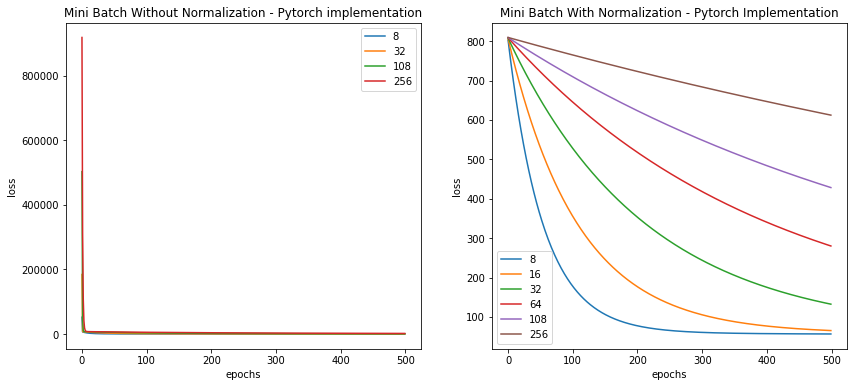

In [181]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(batch_sizes):
    plt.plot(loss_array_mb[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Mini Batch Without Normalization - Pytorch implementation")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(batch_sizes_norm):
    plt.plot(loss_array_mb_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Mini Batch With Normalization - Pytorch Implementation")
plt.legend(loc="best")
plt.show()

***`Observation`***

Mini Batches of 16 - 32 generally performs better with good convergence and with less training time 

SGD takes more time but the convergence is good , 

same opposite with high batch numbers like 256 , they take less time but low convergence

So the middle ground like 16-32 batch numbers enjoys both good convergence and less training time

# Question - 3

$ \delta w_{t} = \beta \delta w_{t-1} + \alpha \nabla J_{t}$

The Beta term is the momentum here

## Numpy Implementation

Implementations according to the official formulations in PyTorch

In [24]:
class Numpy_SGD_with_momentum():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = train.to_numpy(), val.to_numpy()
        self.y_train, self.y_val = y_train.to_numpy(), y_val.to_numpy()

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = normalized_train, normalized_val

    def sgd_momentum_miniBatch(self, lr=1e-3, epochs=100, normalized=False, print_enabled=False, batch_size=1, shuffle_data=False, momentum=0 ):
        
        # weight and Bias Initializing
        np.random.seed(10)
        w = np.random.randn(train.shape[1])
        bias = np.random.randn(1)

        loss_list = []

        # Selecting data based on whether it is normalized or not
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batching the data
        batched_data = [ ( data[i:i+batch_size], self.y_train[i:i+batch_size] ) for i in range(0,len(data),batch_size) ]

        # Shuffling data , if it is given
        if shuffle_data : batched_data = shuffle(batched_data)

        # Batch_GD is done here
        for e in tqdm(range(epochs)):

            epoch_loss = 0

            # To be used in momentum calculation
            weight_change = 0
            bias_change = 0

            for i,batch in enumerate(batched_data):

                data_points, y_true = batch

                y_pred = data_points@w + bias

                # calculating loss here:
                loss = np.mean( ( y_true - y_pred )**2 )/2

                # performing GD here
                w_grad =  - ( data_points.transpose()@( y_true - y_pred ) )/len(data_points)
                bias_grad = -np.mean( y_true - y_pred )

                # calculating momentum here
                weight_change = (momentum)*weight_change + lr*w_grad
                bias_change = (momentum)*bias_change + lr*bias_grad

                # weight update
                w = w - weight_change
                bias = bias - bias_change

                # adding the loss
                epoch_loss += ( loss*len(data_points) )

            # appending loss to the list
            loss_list.append(epoch_loss/len(train))

        if print_enabled:
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} and data_normalized : {normalized} and batch_size : {batch_size} and momentum : {momentum}")
            print(f" Final Validation loss (MSE) is : {np.mean((self.y_val - val_data@w + bias)**2):.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w,bias,val_data,self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")

        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list

After experiments , we have found that lr = 1e-7 for data without normalization works well for both SGD and mini-batches like 16

In [25]:
# For data without normalization

np_momentum = Numpy_SGD_with_momentum()
parameters_momentum_np = {'epochs':30, 'normalized':False, 'print_enabled':True, 'batch_size':1, 'shuffle_data':True, 'lr':1e-7}

In [26]:
momentums = [ 0, 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [np_momentum.sgd_momentum_miniBatch(**parameters_momentum_np, momentum=i) for i in momentums]

100%|██████████| 30/30 [00:00<00:00, 33.56it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0
 Final Validation loss (MSE) is : 114.1139 
 Final Validation R2_score is : 57.1669 %
 Final Train loss (MSE) is : 61.0539  


100%|██████████| 30/30 [00:01<00:00, 25.42it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.2
 Final Validation loss (MSE) is : 116.2238 
 Final Validation R2_score is : 56.3715 %
 Final Train loss (MSE) is : 62.0811  


100%|██████████| 30/30 [00:00<00:00, 34.24it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.4
 Final Validation loss (MSE) is : 121.2416 
 Final Validation R2_score is : 54.4827 %
 Final Train loss (MSE) is : 64.2410  


100%|██████████| 30/30 [00:00<00:00, 32.06it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.7
 Final Validation loss (MSE) is : 152.0661 
 Final Validation R2_score is : 42.8953 %
 Final Train loss (MSE) is : 74.5764  


100%|██████████| 30/30 [00:01<00:00, 25.74it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.9
 Final Validation loss (MSE) is : 524.0944 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 119.0963  


100%|██████████| 30/30 [00:01<00:00, 20.37it/s]

 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.95
 Final Validation loss (MSE) is : 1677.9956 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 191.9528  


We are going to use lr = 1e-4 for data with normalized and this lr also we've found by experiments in last questions

In [27]:
momentums = [ 0, 0.2, 0.4, 0.7, 0.9, 0.95 ]
parameters_momentum_np = {'epochs':30, 'normalized':True, 'print_enabled':False, 'batch_size':1, 'shuffle_data':True, 'lr':1e-4}
loss_list_momentums_norm = [np_momentum.sgd_momentum_miniBatch(**parameters_momentum_np, momentum=i) for i in momentums]

100%|██████████| 30/30 [00:01<00:00, 20.90it/s]


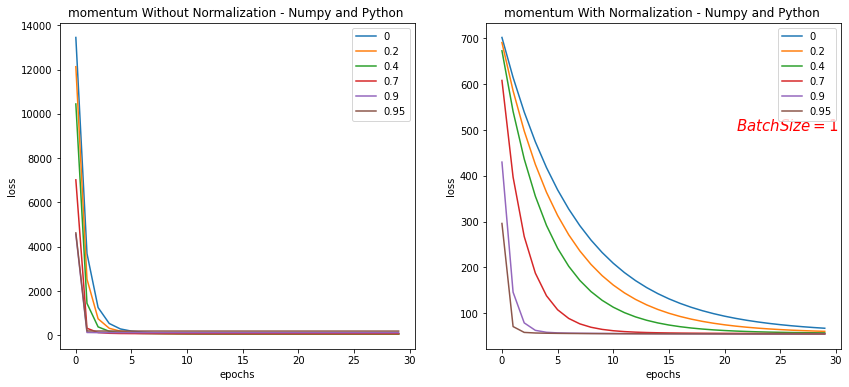

In [28]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - Numpy and Python ")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - Numpy and Python ")
plt.text(21, 500, '$Batch Size = 1$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

***`With Mini Batch = 16`***

In the last question, we have found out that Mini Batch size 16, 32 performs well than other batch sizes like 128, 256 etc..

In [29]:
parameters_momentum_np = {'epochs':500, 'normalized':False, 'print_enabled':True, 'batch_size':16, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [np_momentum.sgd_momentum_miniBatch(**parameters_momentum_np, momentum=i) for i in momentums]

100%|██████████| 500/500 [00:00<00:00, 504.93it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.2
 Final Validation loss (MSE) is : 111.0672 
 Final Validation R2_score is : 58.3232 %
 Final Train loss (MSE) is : 55.4190  


100%|██████████| 500/500 [00:01<00:00, 430.78it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.4
 Final Validation loss (MSE) is : 111.1597 
 Final Validation R2_score is : 58.2875 %
 Final Train loss (MSE) is : 55.5469  


100%|██████████| 500/500 [00:00<00:00, 505.82it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.7
 Final Validation loss (MSE) is : 111.7330 
 Final Validation R2_score is : 58.0703 %
 Final Train loss (MSE) is : 56.1031  


100%|██████████| 500/500 [00:01<00:00, 424.37it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.9
 Final Validation loss (MSE) is : 112.6902 
 Final Validation R2_score is : 57.7068 %
 Final Train loss (MSE) is : 57.0938  


100%|██████████| 500/500 [00:01<00:00, 415.71it/s]

 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.95
 Final Validation loss (MSE) is : 114.5654 
 Final Validation R2_score is : 56.9985 %
 Final Train loss (MSE) is : 57.9562  


In [30]:
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
parameters_momentum_np = {'epochs':500, 'normalized':True, 'print_enabled':False, 'batch_size':16, 'shuffle_data':True, 'lr':1e-4}
loss_list_momentums_norm = [np_momentum.sgd_momentum_miniBatch(**parameters_momentum_np, momentum=i) for i in momentums]

100%|██████████| 500/500 [00:01<00:00, 458.98it/s]


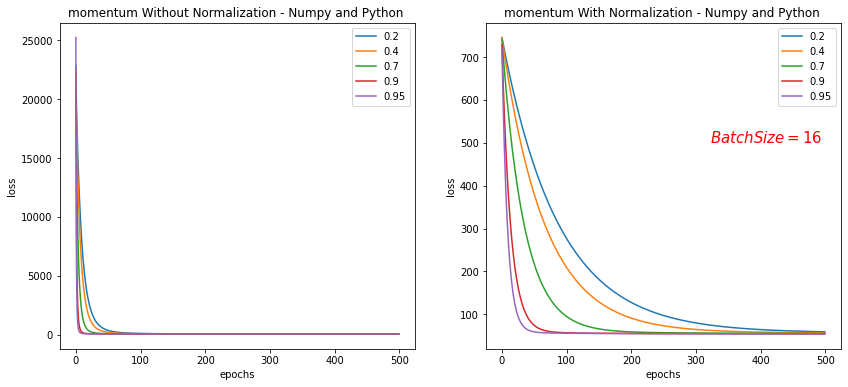

In [31]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - Numpy and Python ")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - Numpy and Python ")
plt.text(321, 500, '$Batch Size = 16$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

## Pytorch Implementation

In [222]:
class PyTorch_SGD_with_momentum():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = torch.tensor(train.to_numpy(), dtype=torch.float32), torch.tensor(val.to_numpy(), dtype=torch.float32)
        self.y_train, self.y_val = torch.tensor(y_train.to_numpy(), dtype=torch.float32), torch.tensor(y_val.to_numpy(), dtype=torch.float32)

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = torch.tensor(normalized_train, dtype=torch.float32), torch.tensor(normalized_val, dtype=torch.float32)

    ''' If Batch Size == 1 and shuffle the data , then we are doing SGD '''
    def sgd_momentum_miniBatch(self, lr=1e-5, epochs=100, normalized=False, print_enabled=False, batch_size=1, shuffle_data=False, moment = 0 ):

        # weight initializing
        torch.manual_seed(10)
        w = torch.randn(train.shape[1], requires_grad=True)
        bias = torch.randn(1, requires_grad=True)

        # optimizer
        optimizer = torch.optim.SGD( [{'params':w, 'lr':lr},{'params':bias, 'lr':lr}] , momentum = moment , nesterov=False)
        
        loss_list = []

        # Data Initialization
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batching the data
        batched_data = [ ( data[i:i+batch_size], self.y_train[i:i+batch_size] ) for i in range(0,len(data),batch_size) ]

        # Shuffling data , if it is given
        if shuffle_data : batched_data = shuffle(batched_data)

        # Mini_Batch_GD is done here
        for e in tqdm(range(epochs)):

            epoch_loss = 0

            for i,batch in enumerate(batched_data):
                
                data_points, y_true = batch

                y_pred = ( data_points@w + bias )

                #print(data_points.shape, y_true) -> just to check

                # calculating loss here:
                loss = (( y_true - y_pred )**2).mean()/2

                # performing back-prop here
                loss.backward()

                # weight update 
                # If we are not using Optimizer, we can use this code block for Weight updation
                ''' with torch.no_grad():
                    # print(w.grad, data_points.transpose(0,1)@(y_true-y_pred)/len(data_points) )
                    w -= lr*w.grad
                    bias -= lr*bias.grad '''
                    
                optimizer.step()
                optimizer.zero_grad()

                # To stop gradient accumulation
                if w.grad != None:  w.grad.zero_()   
                if bias.grad != None: bias.grad.zero_()

                epoch_loss += ( loss.item()*len(data_points) ) # Multiplying the loss with the batch_size to remove the batch dependency of the loss

            # appending mean_loss to the list
            loss_list.append(epoch_loss/len(train))

        if print_enabled: 
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} and data_normalized : {normalized} and batch_size : {batch_size} and momentum : {moment}")
            print(f" Final Validation loss (MSE) is : {torch.mean((self.y_val - val_data@w + bias)**2).item():.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w.detach().numpy(), bias.detach().numpy(),val_data,self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")
        
        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list

In [223]:
# For data without normalization
torch_momentum = PyTorch_SGD_with_momentum()

In [224]:
parameters_momentum_t = {'epochs':30, 'normalized':False, 'print_enabled':True, 'batch_size':1, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [torch_momentum.sgd_momentum_miniBatch(**parameters_momentum_t, moment=i) for i in momentums]

100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.2
 Final Validation loss (MSE) is : 142.3355 
 Final Validation R2_score is : 39.3112 %
 Final Train loss (MSE) is : 71.3420  


100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.4
 Final Validation loss (MSE) is : 192.3730 
 Final Validation R2_score is : 40.2567 %
 Final Train loss (MSE) is : 66.4877  


100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.7
 Final Validation loss (MSE) is : 123.2519 
 Final Validation R2_score is : 46.3194 %
 Final Train loss (MSE) is : 73.8319  


100%|██████████| 30/30 [00:06<00:00,  4.55it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.9
 Final Validation loss (MSE) is : 131.6799 
 Final Validation R2_score is : 41.5924 %
 Final Train loss (MSE) is : 101.1678  


100%|██████████| 30/30 [00:06<00:00,  4.42it/s]

 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.95
 Final Validation loss (MSE) is : 140.5363 
 Final Validation R2_score is : 38.0369 %
 Final Train loss (MSE) is : 159.2275  


In [225]:
parameters_momentum_t = {'epochs':30, 'normalized':True, 'print_enabled':False, 'batch_size':1, 'shuffle_data':True, 'lr':1e-4}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums_norm = [torch_momentum.sgd_momentum_miniBatch(**parameters_momentum_t, moment=i) for i in momentums]

100%|██████████| 30/30 [00:06<00:00,  4.52it/s]


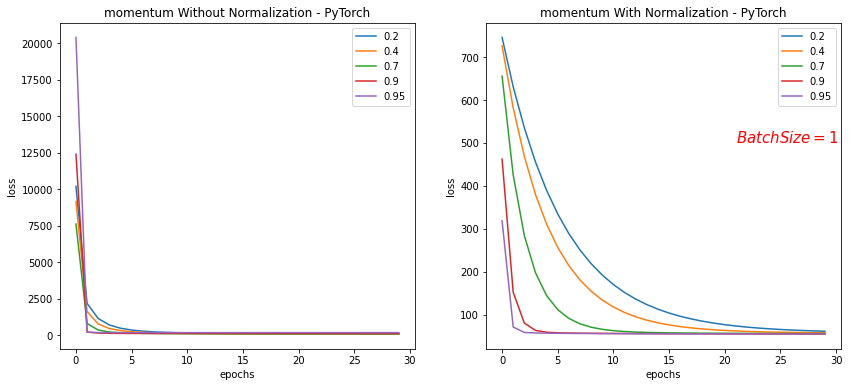

In [227]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - PyTorch")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - PyTorch")
plt.text(21, 500, '$Batch Size = 1$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

***`With MINI Batch = 16`***

In [198]:
parameters_momentum_t = {'epochs':500, 'normalized':False, 'print_enabled':True, 'batch_size':16, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [torch_momentum.sgd_momentum_miniBatch(**parameters_momentum_t, moment=i) for i in momentums]

100%|██████████| 500/500 [00:07<00:00, 67.09it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.2
 Final Validation loss (MSE) is : 134.0789 
 Final Validation R2_score is : 49.9917 %
 Final Train loss (MSE) is : 62.1776  


100%|██████████| 500/500 [00:07<00:00, 70.56it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.4
 Final Validation loss (MSE) is : 129.2959 
 Final Validation R2_score is : 53.8275 %
 Final Train loss (MSE) is : 58.6143  


100%|██████████| 500/500 [00:06<00:00, 72.02it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.7
 Final Validation loss (MSE) is : 124.8173 
 Final Validation R2_score is : 56.4953 %
 Final Train loss (MSE) is : 57.5314  


100%|██████████| 500/500 [00:07<00:00, 64.99it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.9
 Final Validation loss (MSE) is : 118.4761 
 Final Validation R2_score is : 57.1377 %
 Final Train loss (MSE) is : 57.9537  


100%|██████████| 500/500 [00:07<00:00, 69.61it/s]

 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.95
 Final Validation loss (MSE) is : 170.4171 
 Final Validation R2_score is : 47.5473 %
 Final Train loss (MSE) is : 67.0537  


In [199]:
parameters_momentum_t = {'epochs':500, 'normalized':True, 'print_enabled':False, 'batch_size':16, 'shuffle_data':True, 'lr':1e-4}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums_norm = [torch_momentum.sgd_momentum_miniBatch(**parameters_momentum_t, moment=i) for i in momentums]

100%|██████████| 500/500 [00:07<00:00, 67.13it/s]


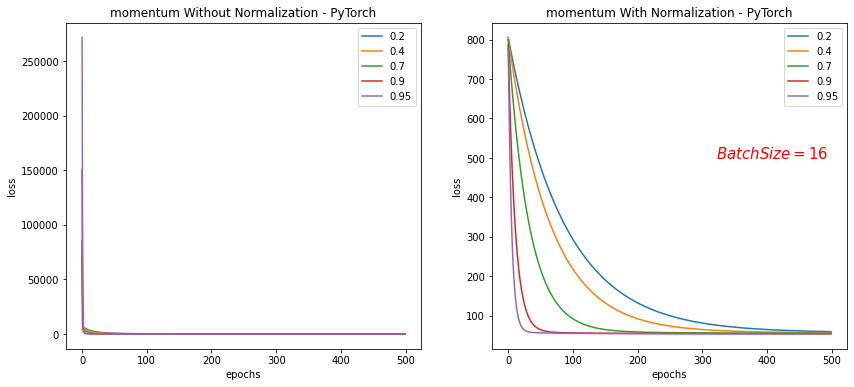

In [200]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - PyTorch")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - PyTorch")
plt.text(321, 500, '$Batch Size = 16$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

Conclusion : 

***Momentum*** helped us to ***reach convergence faster*** than normal GD and ***better convergence observed with same number of epochs***

Makes gradient ***updates less Noisier***

Empirically it is observed that most of the time momentum of ***0.7 gives good results in train data*** and 

momentum of ***0.9 gives less loss in validation data***

good results = less mse loss

# Question - 4

***`J -> Loss, w -> weights`***

$ \delta w_t  = \beta \delta w_{t-1}$ 

$ w_{t+1/2}   = w_{t} - \delta w_t$

$ \delta w_t  = \beta \delta w_{t-1} + \alpha \nabla J|_{w_{t+1/2}}$

Here we are cautious and updating after taking a small step (after momentum update , then we update with grad.J)

## Numpy Implementation of Nesterov Momentum

In [16]:
class Numpy_Nesterov_momentum():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = train.to_numpy(), val.to_numpy()
        self.y_train, self.y_val = y_train.to_numpy(), y_val.to_numpy()

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = normalized_train, normalized_val

    def Nesterov_momentum(self, lr=1e-3, epochs=100, normalized=False, print_enabled=False, batch_size=1, shuffle_data=False, momentum=0 ):
        
        # weight and Bias Initializing
        np.random.seed(10)
        w = np.random.randn(train.shape[1])
        bias = np.random.randn(1)

        loss_list = []

        # Selecting data based on whether it is normalized or not
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batching the data
        batched_data = [ ( data[i:i+batch_size], self.y_train[i:i+batch_size] ) for i in range(0,len(data),batch_size) ]

        # Shuffling data , if it is given
        if shuffle_data : batched_data = shuffle(batched_data)

        # Batch_GD is done here
        for e in tqdm(range(epochs)):

            epoch_loss = 0

            # To be used in momentum calculation
            weight_change = 0
            bias_change = 0

            for i,batch in enumerate(batched_data):

                data_points, y_true = batch

                # updating the weight before (Nesterov momentum)
                weight_change, bias_change = (momentum)*weight_change, (momentum)*bias_change 
                temp_weight, temp_bias = w - weight_change, bias - bias_change

                y_pred = data_points@temp_weight + temp_bias

                # calculating loss here:
                loss = np.mean( ( y_true - y_pred )**2 )/2

                # performing GD here
                w_grad =  - ( data_points.transpose()@( y_true - y_pred ) )/len(data_points)
                bias_grad = -np.mean( y_true - y_pred )

                # calculating momentum here
                weight_change = (momentum)*weight_change + lr*w_grad
                bias_change = (momentum)*bias_change + lr*bias_grad

                # weight update
                w = w - weight_change
                bias = bias - bias_change

                # adding the loss
                epoch_loss += ( loss*len(data_points) )

            # appending loss to the list
            loss_list.append(epoch_loss/len(train))

        if print_enabled:
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} and data_normalized : {normalized} and batch_size : {batch_size} and momentum : {momentum}")
            print(f" Final Validation loss (MSE) is : {np.mean((self.y_val - val_data@w + bias)**2):.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w,bias,val_data,self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")

        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list

In [17]:
# For data without normalization

np_nesterov = Numpy_Nesterov_momentum()

In [18]:
parameters_nesterov_np = {'epochs':30, 'normalized':False, 'print_enabled':True, 'batch_size':1, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [np_nesterov.Nesterov_momentum(**parameters_nesterov_np, momentum=i) for i in momentums]

100%|██████████| 30/30 [00:00<00:00, 32.97it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.2
 Final Validation loss (MSE) is : 114.0644 
 Final Validation R2_score is : 57.1854 %
 Final Train loss (MSE) is : 61.5173  


100%|██████████| 30/30 [00:00<00:00, 31.91it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.4
 Final Validation loss (MSE) is : 114.6815 
 Final Validation R2_score is : 56.9525 %
 Final Train loss (MSE) is : 62.4092  


100%|██████████| 30/30 [00:01<00:00, 28.30it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.7
 Final Validation loss (MSE) is : 119.6548 
 Final Validation R2_score is : 55.0797 %
 Final Train loss (MSE) is : 65.9060  


100%|██████████| 30/30 [00:01<00:00, 29.30it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.9
 Final Validation loss (MSE) is : 139.9138 
 Final Validation R2_score is : 47.4619 %
 Final Train loss (MSE) is : 76.6429  


100%|██████████| 30/30 [00:00<00:00, 31.53it/s]

 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.95
 Final Validation loss (MSE) is : 155.5510 
 Final Validation R2_score is : 41.5855 %
 Final Train loss (MSE) is : 85.4359  


In [19]:
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
parameters_nesterov_np = {'epochs':30, 'normalized':True, 'print_enabled':False, 'batch_size':1, 'shuffle_data':True, 'lr':1e-4}
loss_list_momentums_norm = [np_nesterov.Nesterov_momentum(**parameters_nesterov_np, momentum=i) for i in momentums]

100%|██████████| 30/30 [00:00<00:00, 34.42it/s]


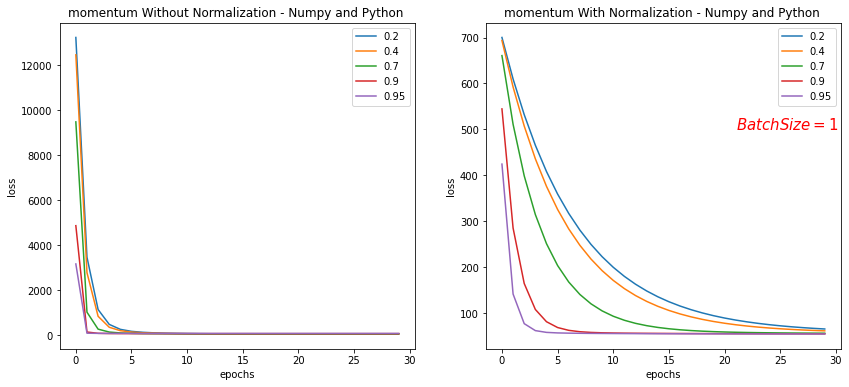

In [20]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - Numpy and Python ")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - Numpy and Python ")
plt.text(21, 500, '$Batch Size = 1$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

***`With Mini Batch = 16`***

In the last question, we have found out that Mini Batch size 16, 32 performs well than other batch sizes like 128, 256 etc..

In [21]:
parameters_nesterov_np = {'epochs':500, 'normalized':False, 'print_enabled':True, 'batch_size':16, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [np_nesterov.Nesterov_momentum(**parameters_nesterov_np, momentum=i) for i in momentums]

100%|██████████| 500/500 [00:01<00:00, 485.71it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.2
 Final Validation loss (MSE) is : 111.1498 
 Final Validation R2_score is : 58.2926 %
 Final Train loss (MSE) is : 55.3508  


100%|██████████| 500/500 [00:01<00:00, 499.17it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.4
 Final Validation loss (MSE) is : 111.0644 
 Final Validation R2_score is : 58.3245 %
 Final Train loss (MSE) is : 55.3061  


100%|██████████| 500/500 [00:01<00:00, 473.96it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.7
 Final Validation loss (MSE) is : 111.2363 
 Final Validation R2_score is : 58.2589 %
 Final Train loss (MSE) is : 55.5069  


100%|██████████| 500/500 [00:00<00:00, 566.02it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.9
 Final Validation loss (MSE) is : 111.7345 
 Final Validation R2_score is : 58.0700 %
 Final Train loss (MSE) is : 56.2640  


100%|██████████| 500/500 [00:01<00:00, 434.75it/s]

 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.95
 Final Validation loss (MSE) is : 111.7246 
 Final Validation R2_score is : 58.0731 %
 Final Train loss (MSE) is : 56.6281  


In [22]:
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
parameters_nesterov_np = {'epochs':500, 'normalized':True, 'print_enabled':False, 'batch_size':16, 'shuffle_data':True, 'lr':1e-4}
loss_list_momentums_norm = [np_nesterov.Nesterov_momentum(**parameters_nesterov_np, momentum=i) for i in momentums]

100%|██████████| 500/500 [00:00<00:00, 538.72it/s]


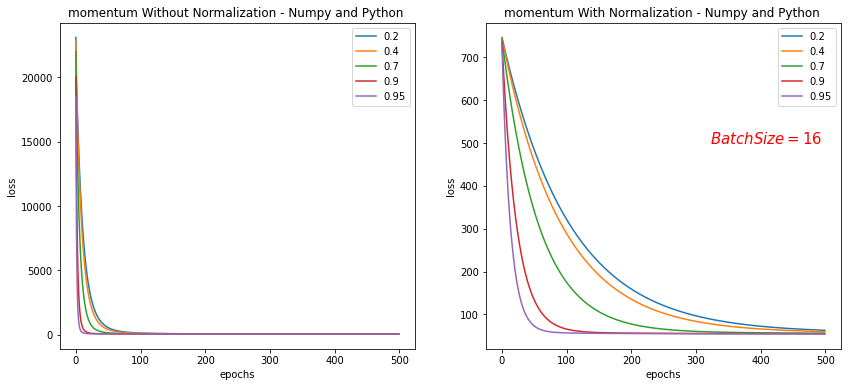

In [23]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - Numpy and Python ")
plt.legend(loc="best")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - Numpy and Python ")
plt.text(321, 500, '$Batch Size = 16$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

## PyTorch Implementation of Nesterov Momentum

In [32]:
class PyTorch_Nesterov_momentum():

    def __init__(self):
        
        # Initializing data here
        self.train, self.val = torch.tensor(train.to_numpy(), dtype=torch.float32), torch.tensor(val.to_numpy(), dtype=torch.float32)
        self.y_train, self.y_val = torch.tensor(y_train.to_numpy(), dtype=torch.float32), torch.tensor(y_val.to_numpy(), dtype=torch.float32)

        # Initializing Normalized data
        self.normalized_train, self.normalized_val = torch.tensor(normalized_train, dtype=torch.float32), torch.tensor(normalized_val, dtype=torch.float32)

    ''' If Batch Size == 1 and shuffle the data , then we are doing SGD '''
    def Nesterov_momentum(self, lr=1e-5, epochs=100, normalized=False, print_enabled=False, batch_size=1, shuffle_data=False, moment = 0 ):

        # weight initializing
        torch.manual_seed(11)
        w = torch.randn(train.shape[1], requires_grad=True)
        bias = torch.randn(1, requires_grad=True)

        # optimizer
        optimizer = torch.optim.SGD( [{'params':w, 'lr':lr},{'params':bias, 'lr':lr}] , momentum = moment , nesterov=True)
        
        loss_list = []

        # Data Initialization
        data = self.train if normalized == False else self.normalized_train
        val_data = self.val if normalized == False else self.normalized_val

        # Batching the data
        batched_data = [ ( data[i:i+batch_size], self.y_train[i:i+batch_size] ) for i in range(0,len(data),batch_size) ]

        # Shuffling data , if it is given
        if shuffle_data : batched_data = shuffle(batched_data)

        # Mini_Batch_GD is done here
        for e in tqdm(range(epochs)):

            epoch_loss = 0

            for i,batch in enumerate(batched_data):
                
                data_points, y_true = batch

                y_pred = ( data_points@w + bias )

                #print(data_points.shape, y_true) -> just to check

                # calculating loss here:
                loss = (( y_true - y_pred )**2).mean()/2

                # performing back-prop here
                loss.backward()

                # weight update 
                # If we are not using Optimizer, we can use this code block for Weight updation
                ''' with torch.no_grad():
                    # print(w.grad, data_points.transpose(0,1)@(y_true-y_pred)/len(data_points) )
                    w -= lr*w.grad
                    bias -= lr*bias.grad '''
                    
                optimizer.step()
                optimizer.zero_grad()

                # To stop gradient accumulation
                if w.grad != None:  w.grad.zero_()   
                if bias.grad != None: bias.grad.zero_()

                epoch_loss += ( loss.item()*len(data_points) ) # Multiplying the loss with the batch_size to remove the batch dependency of the loss

            # appending mean_loss to the list
            loss_list.append(epoch_loss/len(train))

        if print_enabled: 
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} and data_normalized : {normalized} and batch_size : {batch_size} and momentum : {moment}")
            print(f" Final Validation loss (MSE) is : {torch.mean((self.y_val - val_data@w + bias)**2).item():.4f} ")
            print(f" Final Validation R2_score is : {r2_score_calculation(w.detach().numpy(), bias.detach().numpy(),val_data,self.y_val):.4f} %")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")
        
        #self.metrics.get_metrics(w, bias, normalized=False)
        return loss_list

In [33]:
# For data without normalization
torch_nesterov = PyTorch_Nesterov_momentum()

In [34]:
parameters_nesterov_t = {'epochs':30, 'normalized':False, 'print_enabled':True, 'batch_size':1, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [torch_nesterov.Nesterov_momentum(**parameters_nesterov_t, moment=i) for i in momentums]

100%|██████████| 30/30 [00:14<00:00,  2.10it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.2
 Final Validation loss (MSE) is : 153.5028 
 Final Validation R2_score is : 41.5277 %
 Final Train loss (MSE) is : 87.9918  


100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.4
 Final Validation loss (MSE) is : 130.2439 
 Final Validation R2_score is : 50.3369 %
 Final Train loss (MSE) is : 76.7031  


100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.7
 Final Validation loss (MSE) is : 135.4940 
 Final Validation R2_score is : 51.9224 %
 Final Train loss (MSE) is : 76.4313  


100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.9
 Final Validation loss (MSE) is : 187.8991 
 Final Validation R2_score is : 23.2051 %
 Final Train loss (MSE) is : 88.7600  


100%|██████████| 30/30 [00:13<00:00,  2.26it/s]

 Learning_rate : 1e-07 and no.of epochs : 30 and data_normalized : False and batch_size : 1 and momentum : 0.95
 Final Validation loss (MSE) is : 352.5510 
 Final Validation R2_score is : -1.0000 %
 Final Train loss (MSE) is : 93.9706  


In [35]:
parameters_nesterov_t = {'epochs':30, 'normalized':True, 'print_enabled':False, 'batch_size':1, 'shuffle_data':True, 'lr':1e-4}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums_norm = [torch_nesterov.Nesterov_momentum(**parameters_nesterov_t, moment=i) for i in momentums]

100%|██████████| 30/30 [00:06<00:00,  4.53it/s]


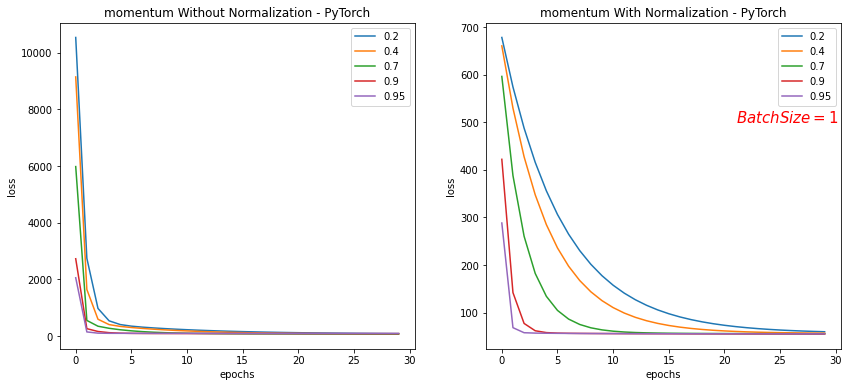

In [37]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - PyTorch")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - PyTorch")
plt.text(21, 500, '$Batch Size = 1$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()

***`With MINI Batch = 16`***

In [38]:
parameters_nesterov_t = {'epochs':500, 'normalized':False, 'print_enabled':True, 'batch_size':16, 'shuffle_data':True, 'lr':1e-7}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums = [torch_nesterov.Nesterov_momentum(**parameters_nesterov_t, moment=i) for i in momentums]

100%|██████████| 500/500 [00:09<00:00, 50.78it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.2
 Final Validation loss (MSE) is : 151.0711 
 Final Validation R2_score is : 44.0565 %
 Final Train loss (MSE) is : 76.2127  


100%|██████████| 500/500 [00:12<00:00, 38.86it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.4
 Final Validation loss (MSE) is : 127.0963 
 Final Validation R2_score is : 52.4237 %
 Final Train loss (MSE) is : 65.9487  


100%|██████████| 500/500 [00:11<00:00, 42.95it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.7
 Final Validation loss (MSE) is : 113.3574 
 Final Validation R2_score is : 57.3172 %
 Final Train loss (MSE) is : 60.7301  


100%|██████████| 500/500 [00:14<00:00, 33.50it/s]


 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.9
 Final Validation loss (MSE) is : 112.3338 
 Final Validation R2_score is : 58.4733 %
 Final Train loss (MSE) is : 59.6080  


100%|██████████| 500/500 [00:10<00:00, 45.53it/s]

 Learning_rate : 1e-07 and no.of epochs : 500 and data_normalized : False and batch_size : 16 and momentum : 0.95
 Final Validation loss (MSE) is : 109.9035 
 Final Validation R2_score is : 57.5183 %
 Final Train loss (MSE) is : 58.5344  


In [39]:
parameters_nesterov_t = {'epochs':500, 'normalized':True, 'print_enabled':False, 'batch_size':16, 'shuffle_data':True, 'lr':1e-4}
momentums = [ 0.2, 0.4, 0.7, 0.9, 0.95 ]
loss_list_momentums_norm = [torch_nesterov.Nesterov_momentum(**parameters_nesterov_t, moment=i) for i in momentums]

100%|██████████| 500/500 [00:10<00:00, 48.92it/s]


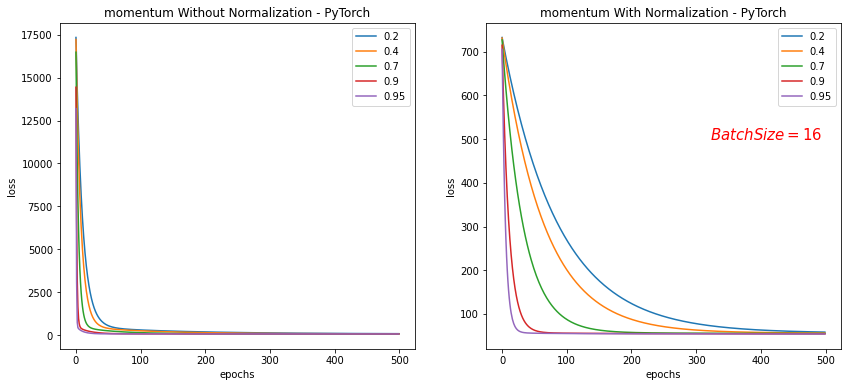

In [40]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum Without Normalization - PyTorch")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
for i,v in enumerate(momentums):
    plt.plot(loss_list_momentums_norm[i], label=v,)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("momentum With Normalization - PyTorch")
plt.text(321, 500, '$Batch Size = 16$', fontsize = 15, color = 'red')
plt.legend(loc="best")
plt.show()